In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
nba_data = pd.read_csv('all_seasons.csv')
nba_data.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Travis Knight,LAL,22.0,213.36,106.59412,Connecticut,USA,1996,1,...,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
1,1,Matt Fish,MIA,27.0,210.82,106.59412,North Carolina-Wilmington,USA,1992,2,...,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,2,Matt Bullard,HOU,30.0,208.28,106.59412,Iowa,USA,Undrafted,Undrafted,...,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,3,Marty Conlon,BOS,29.0,210.82,111.13004,Providence,USA,Undrafted,Undrafted,...,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,4,Martin Muursepp,DAL,22.0,205.74,106.59412,None,USA,1996,1,...,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97


In [3]:
print(nba_data.dtypes)

Unnamed: 0             int64
player_name           object
team_abbreviation     object
age                  float64
player_height        float64
player_weight        float64
college               object
country               object
draft_year            object
draft_round           object
draft_number          object
gp                     int64
pts                  float64
reb                  float64
ast                  float64
net_rating           float64
oreb_pct             float64
dreb_pct             float64
usg_pct              float64
ts_pct               float64
ast_pct              float64
season                object
dtype: object


In [5]:
players_ages = nba_data['age']
minimum_age = players_ages.min()
maximum_age = players_ages.max()
print('The minimum and maximum ages of players are {} and {}'.format(minimum_age, maximum_age))

The minimum and maximum ages of players are 18.0 and 44.0


In [6]:
bins = [15, 20, 25, 30, 35, 40, 45]
nba_data['binned_ages'] = pd.cut(nba_data['age'], bins)
print(nba_data[['binned_ages', 'age']])

      binned_ages   age
0        (20, 25]  22.0
1        (25, 30]  27.0
2        (25, 30]  30.0
3        (25, 30]  29.0
4        (20, 25]  22.0
...           ...   ...
11695    (25, 30]  30.0
11696    (25, 30]  28.0
11697    (20, 25]  25.0
11698    (30, 35]  31.0
11699    (20, 25]  25.0

[11700 rows x 2 columns]


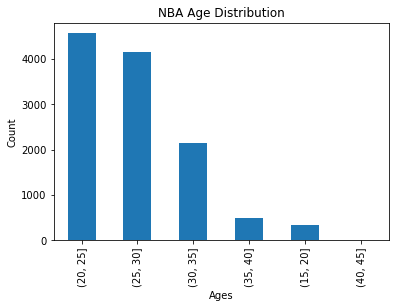

In [7]:
nba_data['binned_ages'].value_counts().plot(kind='bar')

plt.title('NBA Age Distribution')
plt.xlabel('Ages')
plt.ylabel('Count')

plt.show()